# PRUEBA CON ALGUNOS DATASETS.

## IMPORTACIÓN.

In [5]:
# Importamos las librerías necesarias.

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## CARGA DE DATOS.

### Dataset: NASA.

In [10]:
# Importo el dataset.

data_nasa = pd.read_csv('./data/dataset_nasa.csv')

# Muestro las 5 primeras columnas y un shape para verificar que se ha cargado correctamente.

data_nasa.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [11]:
data_nasa.shape

(45716, 10)

### Dataset: The Meteoritical Society.

In [12]:
# Importo el dataset.

data_tms = pd.read_csv('./data/dataset_meteoritical_society.csv')

# Muestro las 5 primeras columnas y un shape para verificar que se ha cargado correctamente.

data_tms.head()

,name,id,type,recclass,mass,fall,year,lat,long
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,2002,-33.16667,-64.95000


In [13]:
data_tms.shape

(31723, 9)

### Dataset: International Meteor Organization.

In [17]:
# Importo el dataset.

data_imo = pd.read_csv('./data/dataset_imo_1999_2020.csv')

# Muestro las 5 primeras columnas y un shape para verificar que se ha cargado correctamente.

data_imo.head()

,Session ID,Start Date,Observer ID,Submitter ID,Actual Observer Name,Submitted by,City,Country,Latitude,Longitude,Elevation
0,162,2008-12-19 09:08:00,283.0,283,Salvador Aguirre,Salvador Aguirre,"Ej. El Carmen, Sonor",Mexico,29.319444,-110.822778,0.0
1,163,2008-12-22 05:20:00,283.0,283,Salvador Aguirre,Salvador Aguirre,"Ej. El Carmen, Sonor",Mexico,29.319444,-110.822778,0.0
2,164,2008-12-31 10:47:00,283.0,283,Salvador Aguirre,Salvador Aguirre,"Ej. El Carmen, Sonor",Mexico,29.319444,-110.822778,0.0
3,311,2008-08-11 21:50:00,630.0,630,Reyhane Akhbari,Reyhane Akhbari,Hesar Sorkh,Iran,36.005556,58.321111,0.0
4,918,2008-08-11 23:00:00,710.0,710,Igor Arolovich,Igor Arolovich,Mount Tayasim,Israel,31.766667,35.083333,0.0


In [18]:
data_imo.shape

(42989, 11)

## COMBINACIÓN DE DATOS.

### Datasets: NASA & TMS.

In [19]:
"""
Puesto que el dataset de la NASA solo 
incluye registros hasta 2013, y el dataset 
de TMS incluye registros posteriores (siendo
duplicados los de 2013 hacia atrás), voy a unir
este segundo dataset al de la NASA para tener
más datos disponibles.
"""

# Hago una copia para no alterar el dataset original.

data_tms_2 = data_tms.copy()

# Le aplico una máscara para seleccionar solo aquellos valores posteriores a 2013.

mask = data_tms_2['year'] > 2013
data_tms_filtrado = data_tms_2[mask]
data_tms_filtrado.head()

,name,id,type,recclass,mass,fall,year,lat,long
37,Appley Bridge,2318,Valid,LL6,15000.0,Fell,2014,53.58333,-2.71667
77,Baxter,4977,Valid,L6,611.0,Fell,2016,36.75000,-93.50000
114,Boguslavka,5098,Valid,"""Iron IIAB""",256000.0,Fell,2016,44.55000,131.63333
142,Calivo,5200,Valid,Stone-uncl,2400.0,Fell,2016,11.75000,122.33333
246,Ekh Khera,7777,Valid,H6,840.0,Fell,2016,28.26667,78.78333


In [20]:
# Ahora renombraré las columnas del dataset de la NASA para que coincidan con el de TMS.

data_nasa_2 = data_nasa.copy()
data_nasa_2 = data_nasa_2.rename(columns = {'reclat':'lat', 'reclong':'long', 'nametype':'type', 'mass (g)':'mass'})
data_nasa_2.head()

,name,id,type,recclass,mass,fall,year,lat,long,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [21]:
# Por último procedo unir ambos datasets de forma vertical, asumiendo que tendré NaN's en 
# la columna 'GeoLocation', pero no le prestaré atención ya que luego la voy a eliminar.

data_meteor = pd.concat([data_nasa_2, data_tms_filtrado], axis = 0)

# Muestro las 5 primeras columnas y un shape para verificar que se ha cargado correctamente.

data_meteor.head()

,name,id,type,recclass,mass,fall,year,lat,long,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [22]:
data_meteor.shape

(45766, 10)

In [23]:
"""
Me interesa guardar este dataframe como un dataset independiente en caso
de que finalmente solo haga un análisis relativo a los meteoritos en
exclusiva, dejando a otro lado el análisis de las obvervaciones.
Para ello lo guardaré en otra variable y eliminaré la columna 'Geolocation'
(cosa que haré más tarde), para importarlo a un '.csv' y usarlo así
si fuera necesario.
"""

# Realizo una copia en otra variable.

data_meteor_ind = data_meteor.copy()
data_meteor_ind = data_meteor_ind.drop(['GeoLocation'], axis = 1)

In [24]:
"""
Como quiero guardarme este dataset antes de unirlo al del IMO, voy a
realizarle una limpieza de datos previa.
"""

# Comprueba si hay valores NaN's en el dataset.

data_meteor_ind.isnull().sum()

name           0
id             0
type           0
recclass       0
mass         131
fall           0
year         288
lat         7315
long        7315
dtype: int64

In [25]:
# Ya lo tengo listo para guardarlo en un '.csv' independiente.

data_meteor_ind.to_csv('./data/dataset_meteor.csv', index = False)

### Datasets: Meteor(combinado de NASA y TMS) & IMO. 

In [26]:
"""
Esta vez ambos datasets contienen información que, aunque está relacionada, es totalmente diferente,
por tanto voy a unirlos teniendo eso en cuenta para tener el máximo orden posible al tratar los
datos posteriormente.
"""

# Procedo a combinar ambos datasets aplicando un keys para distinguir mejor los datos de cada uno.

data_total = pd.concat([data_meteor, data_imo], sort=False, keys=['METEOR', 'IMO'])

# Muestro un head y un shape para verificar que se ha cargado correctamente, así como las columnas.

print(data_total.head)

<bound method NDFrame.head of                   name     id   type     recclass      mass  fall    year  \
METEOR 0        Aachen    1.0  Valid           L5      21.0  Fell  1880.0   
       1        Aarhus    2.0  Valid           H6     720.0  Fell  1951.0   
       2          Abee    6.0  Valid          EH4  107000.0  Fell  1952.0   
       3      Acapulco   10.0  Valid  Acapulcoite    1914.0  Fell  1976.0   
       4       Achiras  370.0  Valid           L6     780.0  Fell  1902.0   
...                ...    ...    ...          ...       ...   ...     ...   
IMO    42984       NaN    NaN    NaN          NaN       NaN   NaN     NaN   
       42985       NaN    NaN    NaN          NaN       NaN   NaN     NaN   
       42986       NaN    NaN    NaN          NaN       NaN   NaN     NaN   
       42987       NaN    NaN    NaN          NaN       NaN   NaN     NaN   
       42988       NaN    NaN    NaN          NaN       NaN   NaN     NaN   

                   lat       long            

In [27]:
data_total.columns

Index(['name', 'id', 'type', 'recclass', 'mass', 'fall', 'year', 'lat', 'long',
       'GeoLocation', 'Session ID', 'Start Date', 'Observer ID',
       'Submitter ID', 'Actual Observer Name', 'Submitted by', 'City',
       'Country', 'Latitude', 'Longitude', 'Elevation'],
      dtype='object')

In [28]:
data_total.shape

(88755, 21)

## Limpieza de los datos.

In [29]:
"""
En este apartado llevaremos a cabo la limpieza de los datos. 
Además de eliminar varias columnas innecesarias que no aportan
nada al análisis que se pretende llevar a cabo, se tratarán los
NaN's de manera que el resultado final esté lo menos sesgado
posible.
"""

# Primero eliminaré las columnas que no resultan necesarias.

data_total = data_total.drop(['name', 'type', 'GeoLocation', 'Observer ID', 'Submitter ID', 'Actual Observer Name', 'Submitted by'], axis=1)

In [30]:
# Comprobaremos el número de NaN's.

data_total.isnull().sum()

id            42989
recclass      42989
mass          43120
fall          42989
year          43277
lat           50304
long          50304
Session ID    45766
Start Date    45766
City          45778
Country       45778
Latitude      45778
Longitude     45778
Elevation     45778
dtype: int64

In [31]:
# Ahora voy a comenzar usando fillna para rellenar los NaN's de la columna 'id' del dataset Meteor con los datos de
# la columna 'Session Id' del dataset IMO.

data_total['id'] = data_total['id'].fillna(data_total['Session ID'][45766:])

In [32]:
# Ahora haré lo mismo desde 'Latitude' de IMO a los NaN's de 'lat' en Meteor.

data_total['lat'] = data_total['lat'].fillna(data_total['Latitude'][45766:])

In [33]:
# Igual, pero con 'Longitude' y 'long'.

data_total['long'] = data_total['long'].fillna(data_total['Longitude'][45766:])

In [34]:
# Ahora voy a convertir las fechas de 'Start Date' de IMO al formato de 'year' de Meteor mediante un bucle.

for i in range(45766, np.shape(data_total)[0]):
    data_total['Start Date'][i] = data_total['Start Date'][i][:4]

<ipython-input-34-36632382c3b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_total['Start Date'][i] = data_total['Start Date'][i][:4]


In [35]:
# Por último, rellenaré los NaN's de 'year' en Meteor con los datos de 'Start Date' de IMO.

data_total['year'] = data_total['year'].fillna(data_total['Start Date'][45766:])

In [36]:
print(data_total.isnull().sum())

id                0
recclass      42989
mass          43120
fall          42989
year            288
lat            7327
long           7327
Session ID    45766
Start Date    45766
City          45778
Country       45778
Latitude      45778
Longitude     45778
Elevation     45778
dtype: int64


In [37]:
# Elimino el resto de columnas innecesarias (por información duplicada o inservible).

data_total = data_total = data_total.drop(['Session ID', 'Start Date', 'City'
                                           ,'Latitude', 'Longitude'], axis=1)

In [38]:
# Cambio el nombre de la columna 'recclass' a 'class' por comodidad.

data_total.rename(columns={'recclass':'class'}, inplace=True)

### Tratamiendo del resto de NaN's.

#### Reemplazo de los valores numéricos.

In [39]:
# Reemplazo los NaN's numéricos por la media de los mismos y compruebo el resultado.

data_total[['mass']] = data_total[['mass']].fillna(data_total[['mass']].mean())
data_total[['year']] = data_total[['year']].fillna(data_total[['year']].mean())
data_total[['lat']] = data_total[['lat']].fillna(data_total[['lat']].mean())
data_total[['long']] = data_total[['long']].fillna(data_total[['long']].mean())
data_total[['Elevation']] = data_total[['Elevation']].fillna(data_total[['Elevation']].mean())

print(data_total.isnull().sum())

id               0
class        42989
mass             0
fall         42989
year           288
lat              0
long             0
Country      45778
Elevation        0
dtype: int64


In [40]:
# Quedan algunos NaN's en la columna 'year' que no sé cómo tratar,
# por tanto eliminaré dichas filas.

data_total = data_total.dropna(subset=["year"])

In [41]:
# Reemplazo los NaN's categóricos por 'N/A'.

data_total['class'] = data_total['class'].replace(np.NaN, 'N/A')
data_total['fall'] = data_total['fall'].replace(np.NaN, 'N/A')
data_total['Country'] = data_total['Country'].replace(np.NaN, 'N/A')

In [42]:
# Compruebo cómo ha quedado el dataframe final.

data_total.head

<bound method NDFrame.head of                    id        class           mass  fall    year        lat  \
METEOR 0          1.0           L5      21.000000  Fell  1880.0  50.775000   
       1          2.0           H6     720.000000  Fell  1951.0  56.183330   
       2          6.0          EH4  107000.000000  Fell  1952.0  54.216670   
       3         10.0  Acapulcoite    1914.000000  Fell  1976.0  16.883330   
       4        370.0           L6     780.000000  Fell  1902.0 -33.166670   
...               ...          ...            ...   ...     ...        ...   
IMO    42984  75686.0          N/A   13309.119758   N/A    2005 -38.000000   
       42985  75687.0          N/A   13309.119758   N/A    2005 -38.000000   
       42986  75691.0          N/A   13309.119758   N/A    2005 -36.816110   
       42987  75692.0          N/A   13309.119758   N/A    2005 -36.816110   
       42988  78769.0          N/A   13309.119758   N/A    2005  53.033333   

                    long    Count

In [43]:
print(data_total.isnull().sum())
print(data_total.shape)

id           0
class        0
mass         0
fall         0
year         0
lat          0
long         0
Country      0
Elevation    0
dtype: int64
(88467, 9)


In [44]:
# Por último guardaré el dataframe 'data_total' en un '.csv' independiente
# en la carpeta 'data' junto a los demás.

data_total.to_csv('./data/dataset_meteor_imo.csv', index = False)

## VISUALIZACIONES Y A. EXPLORATORIO.

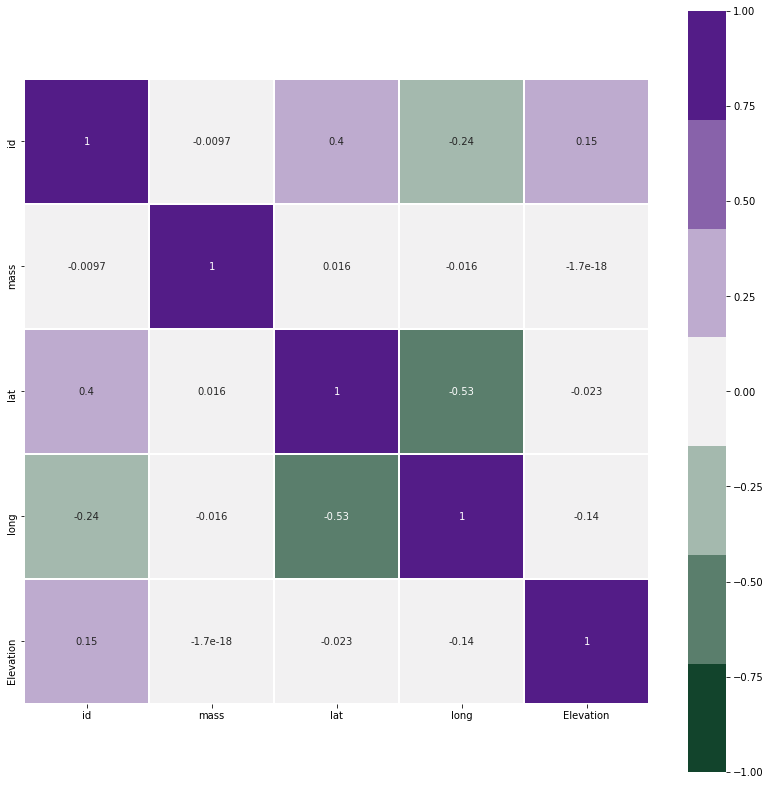

In [46]:
plt.figure(figsize=(14,14))
sns.heatmap(data_total.corr(),
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = .5);

In [47]:
# He decidido no usar este notebook porque he caído en complicaciones innecesarias.